# Lecture 13: Intro to probability

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('DonPedroData.csv')
df['date'] = pd.to_datetime(df.DATE, format='%m/%d/%y' )
df['year'] = df.date.dt.year
df['dayofyear'] = df.date.dt.dayofyear
df.head()

,STATION_ID,DURATION,DATE,INFLOW_cfs,OUTFLOW_cfs,STORAGE_af,date,year,dayofyear
0,DNP,D,1/1/94,213.0,213.0,NaN,1994-01-01,1994,1
1,DNP,D,1/2/94,213.0,213.0,1586937.0,1994-01-02,1994,2
2,DNP,D,1/3/94,656.0,204.0,1584792.0,1994-01-03,1994,3
3,DNP,D,1/4/94,656.0,204.0,1584792.0,1994-01-04,1994,4
4,DNP,D,1/5/94,NaN,NaN,1583721.0,1994-01-05,1994,5


Text(0, 0.5, 'Inflow (cfs)')

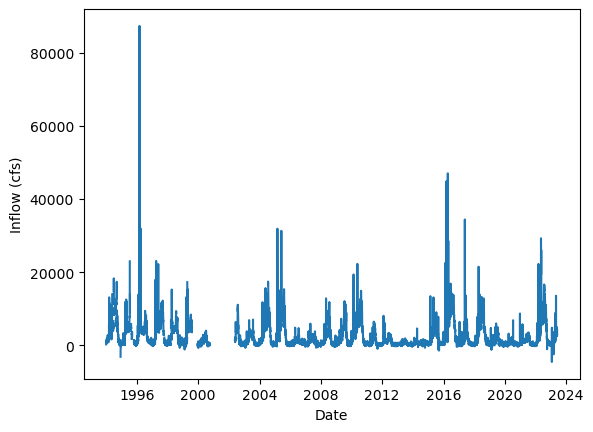

In [226]:
plt.plot(df.date, df.INFLOW_cfs)
plt.xlabel("Date")
plt.ylabel("Inflow (cfs)")


<Axes: xlabel='dayofyear', ylabel='INFLOW_cfs'>

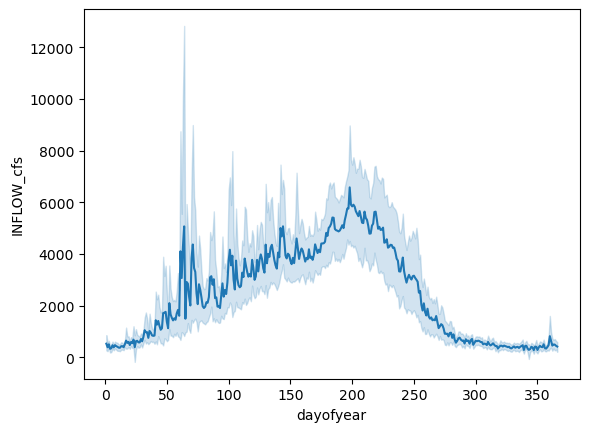

In [227]:
import seaborn as sns

sns.lineplot(data=df, x="dayofyear", y="INFLOW_cfs")

array([[<Axes: title={'center': 'INFLOW_cfs'}>]], dtype=object)

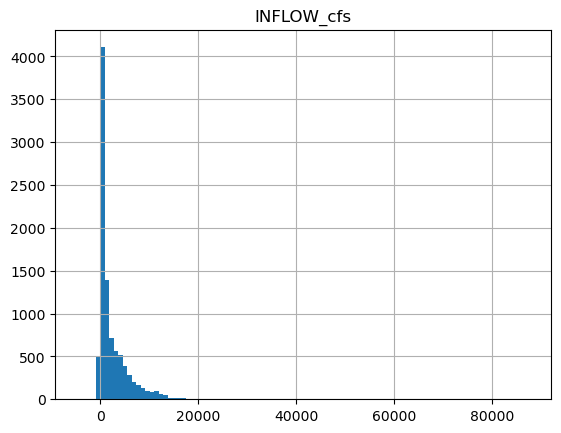

In [228]:
#Lets plot a histogram (visual representation of the probability distribution function)

df.hist("INFLOW_cfs", bins=100)

In [229]:
#Percentile to plot empirical cummulative distribution function
#Let's remove zeros first
df.loc[df.INFLOW_cfs<0,"INFLOW_cfs"]=np.nan
df['inf_percentile'] = df.INFLOW_cfs.rank(pct = True)
df.head()

,STATION_ID,DURATION,DATE,INFLOW_cfs,OUTFLOW_cfs,STORAGE_af,date,year,dayofyear,inf_percentile
0,DNP,D,1/1/94,213.0,213.0,NaN,1994-01-01,1994,1,0.092030
1,DNP,D,1/2/94,213.0,213.0,1586937.0,1994-01-02,1994,2,0.092030
2,DNP,D,1/3/94,656.0,204.0,1584792.0,1994-01-03,1994,3,0.353305
3,DNP,D,1/4/94,656.0,204.0,1584792.0,1994-01-04,1994,4,0.353305
4,DNP,D,1/5/94,NaN,NaN,1583721.0,1994-01-05,1994,5,NaN


Text(0.5, 0.98, 'Empirican cummulative distribution function (obtained from percentile)')

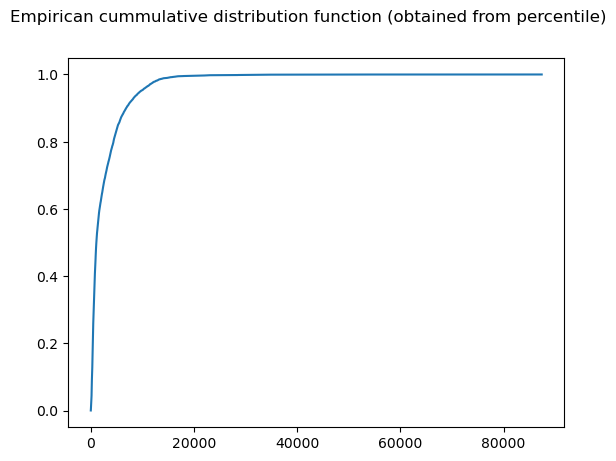

In [230]:
df = df.sort_values("inf_percentile")
plt.plot(df.INFLOW_cfs, df.inf_percentile)
plt.suptitle("Empirican cummulative distribution function (obtained from percentile)")

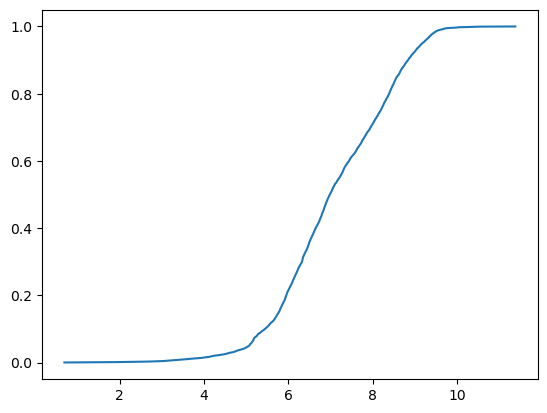

In [231]:
df.loc[df.INFLOW_cfs<=0,'INFLOW_cfs'] = np.nan #to avoid log problems with negative numbers
df['log_inf'] = np.log(df.INFLOW_cfs)
df['log_inf_perc'] = df.log_inf.rank(pct = True)
plt.plot(df.log_inf, df.log_inf_perc)

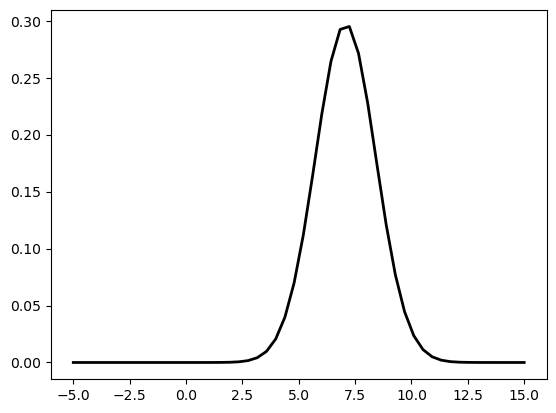

In [232]:
from scipy.stats import norm
mu, std = norm.fit(df.log_inf.dropna())
x = np.linspace(-5, 15, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

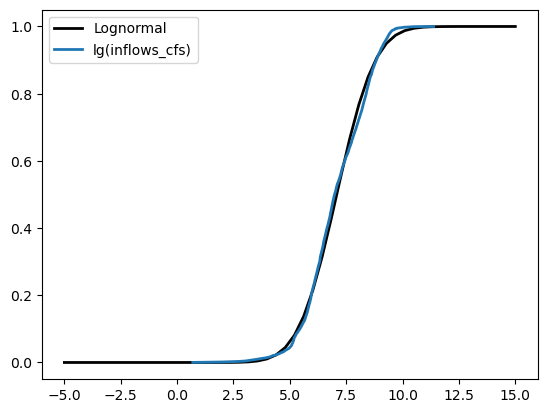

In [233]:
#Now the cummulative distribution to check
q = norm.cdf(x, mu, std)
plt.plot(x, q, 'k', linewidth=2, label = 'Lognormal')
plt.plot(df.log_inf, df.log_inf_perc, linewidth = 2, label = 'lg(inflows_cfs)')
plt.legend()

In [247]:
#Other distributions (gamma, gumbel, log-pearson type 3)
import scipy.stats as stats

data = df.INFLOW_cfs.dropna()

# fit lognormal distribution
sigma, loc, scale = stats.lognorm.fit(data)
# evaluate lognormal distribution
lognormal_test = stats.kstest(data, stats.lognorm.cdf, args=(sigma, loc, scale))

# fit gamma distribution
shape, loc, scale = stats.gamma.fit(data)
# evaluate gamma distribution
gamma_test = stats.kstest(data, stats.gamma.cdf, args=(shape, loc, scale))

# fit pearson3 distribution
shape, loc, scale = stats.pearson3.fit(data)
# evaluate beta distribution
pearson3_test = stats.kstest(data, stats.pearson3.cdf, args=(shape, loc, scale))

# fit gumbel distribution
loc, scale = stats.gumbel_r.fit(data)
# evaluate beta distribution
gumbel_test = stats.kstest(data, stats.gumbel_r.cdf, args=(loc, scale))

print(lognormal_test)
print(gamma_test)
print(pearson3_test)
print(gumbel_test)


KstestResult(statistic=0.04811687761484118, pvalue=1.226851690794672e-18, statistic_location=3586.0, statistic_sign=-1)
KstestResult(statistic=0.9989449188767633, pvalue=0.0, statistic_location=6.0, statistic_sign=-1)
KstestResult(statistic=0.09821659640271618, pvalue=2.1107577234415193e-76, statistic_location=4217.0, statistic_sign=-1)
KstestResult(statistic=0.1845102908200839, pvalue=5.363240578884271e-270, statistic_location=1162.0, statistic_sign=1)


2809.054099212096 4448.529059838393
2594.7565505804314 3600.1011515521254


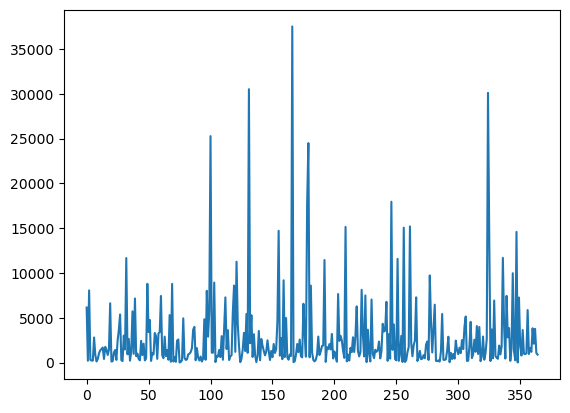

In [273]:
#Generating random variables from known distributions

parameters = stats.lognorm.fit(data)

generated = stats.lognorm(parameters[0], parameters[1], parameters[2]).rvs(size=365)

#print(generated)
print(generated.mean(), generated.std())
print(data.mean(), data.std())

plt.plot(generated)

In [277]:
#Montecarlo
from random import randrange

iterations = 50

x = np.empty(iterations)
y = np.empty(iterations)
x_in = np.empty(iterations)
y_in = np.empty(iterations)
x_out = np.empty(iterations)
y_out = np.empty(iterations)

counter = 0
for i in range(iterations):
    x[i] = 0.001*randrange(-1000,1000)
    y[i] = 0.001*randrange(-1000,1000)
    if np.sqrt(x[i]**2 + y[i]**2) <1:
        counter = counter+1
        x_in[i] = x[i]
        y_in[i] = y[i]
        x_out[i] = np.nan
        y_out[i] = np.nan
    else:
        x_out[i] = x[i]
        y_out[i] = y[i]
        x_in[i] = np.nan
        y_in[i] = np.nan

pi_approx = 4 * counter/iterations
        
print(pi_approx)
    


3.28


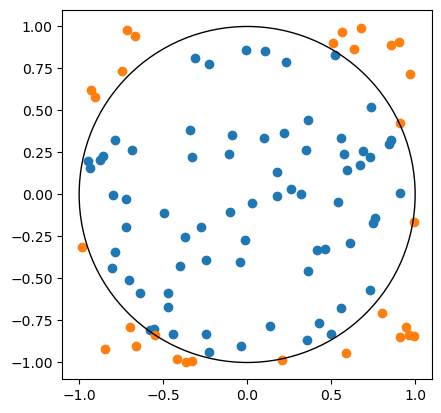

In [275]:
fig, ax = plt.subplots()

plt.scatter(x_in,y_in)
plt.scatter(x_out,y_out)
circle = plt.Circle((0, 0 ), 1.0 , fill = False )
ax.add_patch(circle)
ax.set_aspect('equal')

3.1426399999999997


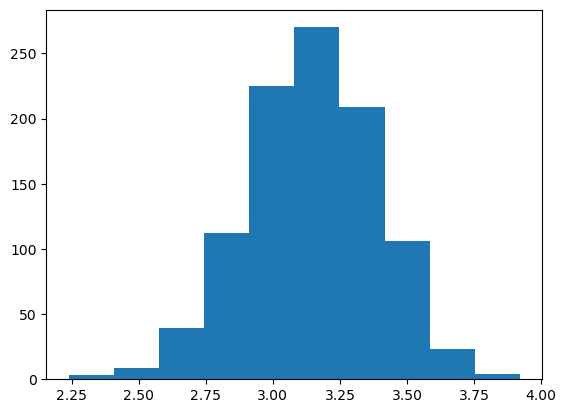

In [276]:
loops = 1000

results = np.empty(loops)

for j in range(loops):

    iterations = 50

    x = np.empty(iterations)
    y = np.empty(iterations)
    x_in = np.empty(iterations)
    y_in = np.empty(iterations)
    x_out = np.empty(iterations)
    y_out = np.empty(iterations)

    counter = 0
    for i in range(iterations):
        x[i] = 0.001*randrange(-1000,1000)
        y[i] = 0.001*randrange(-1000,1000)
        if np.sqrt(x[i]**2 + y[i]**2) <1:
            counter = counter+1
            x_in[i] = x[i]
            y_in[i] = y[i]
            x_out[i] = np.nan
            y_out[i] = np.nan
        else:
            x_out[i] = x[i]
            y_out[i] = y[i]
            x_in[i] = np.nan
            y_in[i] = np.nan

    pi_approx = 4 * counter/iterations

    results[j] = pi_approx



plt.hist(results, bins=10)
print(results.mean())

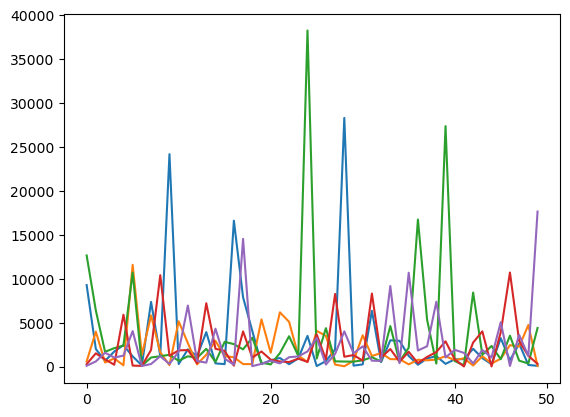

In [279]:
#Generating random inflows that could be included in a Monte Carlo analysis of reservoir simulation
parameters = stats.lognorm.fit(data)

for i in range(5):
    generated = stats.lognorm(parameters[0], parameters[1], parameters[2]).rvs(size=50)
    plt.plot(generated)